<a href="https://colab.research.google.com/github/waiyankyaw961999/ML_DL_learningpath/blob/master/Guided%20Project/Neural_Network_from_Scratch_in_TensorFlow/Neural_Network_from_Scratch_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project-based Course 

Course Name - **[Neural Network from Scratch in TensorFlow ](https://www.coursera.org/learn/neural-network-tensorflow)**

Instructor - **Amit**

**This notebook is not 100% identical to original author's notebook.**

##Course Objectives
In this course, we are going to focus on two learning objectives:

* How to implement a neural network model from scratch using TensorFlow.
Solving a multi-class classification problem using the neural network implementation.
* By the end of this course, you will be able to implement a Neural Network model in TensorFlow using its core functionality. You will also implement the gradient descent algorithm with the help of TensorFlow's automatic differentiation. Finally, you will be able to use this implementation to solve a multi-class classification problem.

##Task1: Initializing Neural Network

* Creating the Neural Network class.
* Understanding the init function.
* Setting up initial parameter values.


In [1]:
%cd "/content/drive/My Drive/Colab Notebooks/ML_DL_learningpath"
# changing directory to the current root
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nn_utils
%matplotlib inline

/content/drive/My Drive/Colab Notebooks/ML_DL_learningpath


In [2]:
class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.L = len(layers)
        self.num_features = layers[0]
        self.num_classes = layers[-1]
    
        self.W = {}
        self.b = {}
        self.dW = {}
        self.db = {}
        self.setup()
    def setup(self):

      for i in range(1, self.L):
        self.W[i] = tf.Variable(tf.random.normal(shape=(self.layers[i],
                                                        self.layers[i-1])))
        self.b[i] = tf.Variable(tf.random.normal(shape = (self.layers[i],
                                                        1)))


##Task 2: Forward Pass
* Creating a forward pass function.

In [3]:
class NeuralNetwork(NeuralNetwork):
  def forward_pass(self,X):
    A = tf.convert_to_tensor(X,dtype = tf.float32)
    for i in range(1,self.L):
      Z = tf.matmul(A,tf.transpose(self.W[i]))+tf.transpose(self.b[i])
      if i !=self.L-1:
        A =tf.nn.relu(Z)
      else: 
        A = Z
    return A

##Task 3: Computing Loss and Updating Parameters

* Using the cross entropy loss with logits.
* Updating parameters for all the layers.

In [4]:
class NeuralNetwork(NeuralNetwork):
  def compute_loss(self,A,Y):
    loss = tf.nn.softmax_cross_entropy_with_logits(Y,A)
    return tf.reduce_mean(loss) 

  def update_params(self, lr):
    for i in range(1,self.L):
      self.W[i].assign_sub(lr*self.dW[i])
      self.b[i].assign_sub(lr*self.db[i]) 

##Task 4: Predict and Info Functions

* Understanding the pre-written info function.
* Creating a predict function with the help of the forward pass.

In [5]:
class NeuralNetwork(NeuralNetwork):
  def predict(self,X):
    A = self.forward_pass(X)
    return tf.argmax(tf.nn.softmax(A),axis = 1)

  def info(self):
        num_params = 0
        for i in range(1, self.L):
            num_params += self.W[i].shape[0]*self.W[i].shape[1]
            num_params += self.b[i].shape[0]
        print('Input Features:', self.num_features)
        print('Number of Classes:', self.num_classes)
        print('Hidden Layers:')
        print('--------------')
        for i in range(1, self.L-1):
            print('Layer {}, Units {}'.format(i, self.layers[i]))
        print('--------------')
        print('Number of parameters:', num_params)


##Task 5: Training on Batch

* Creating the main training mechanism.
* Implementing gradient descent with automatic differentiation.

In [6]:
class NeuralNetwork(NeuralNetwork):
  def train_on_batch(self,X,Y,lr):
    X = tf.convert_to_tensor(X,dtype = tf.float32)
    Y = tf.convert_to_tensor(Y,dtype = tf.float32)

    with tf.GradientTape(persistent = True) as tape:
      A = self.forward_pass(X)
      loss = self.compute_loss(A,Y)
    for i in range(1,self.L):
      self.dW[i] = tape.gradient(loss,self.W[i])
      self.db[i] = tape.gradient(loss,self.b[i])
    
    del tape
    self.update_params(lr)
    return loss.numpy()


##Task 6: Training on Complete Set

* Breaking down data-set in batches.
* Breaking down the training process in epochs and steps.

In [7]:
class NeuralNetwork(NeuralNetwork):
  def train(self, x_train, y_train, x_test, y_test,
            epochs, steps_per_epoch, batch_size, lr):
    
    history = {'val_loss': [],
              'train_loss': [],
              'val_acc': []
              }
    for e in range(0,epochs):
      epoch_train_loss = 0
      print('Epoch {}'.format(e),end = '.')
      for i in range(0,steps_per_epoch):
        x_batch = x_train[i*batch_size:(i+1)*batch_size]
        y_batch = y_train[i*batch_size:(i+1)*batch_size]

        batch_loss = self.train_on_batch(x_batch,y_batch,lr)
        epoch_train_loss += batch_loss

        if i%int(steps_per_epoch/10)== 0:
          print(end = '.')

      history['train_loss'].append(epoch_train_loss/steps_per_epoch)
      val_A = self.forward_pass(x_test)
      val_loss = self.compute_loss(val_A,y_test).numpy()
      history['val_loss'].append(val_loss)
      val_preds = self.predict(x_test)
      val_acc = np.mean(np.argmax(y_test,axis = 1) == val_preds.numpy())
      history['val_acc'].append(val_acc)     
      print('Val acc:', val_acc)

    return history  
      



##Task 7: Application

* Applying the neural network model to solve a multi-class classification problem.
* Creating model instance and setting up hyperparameters.
* Training the model.

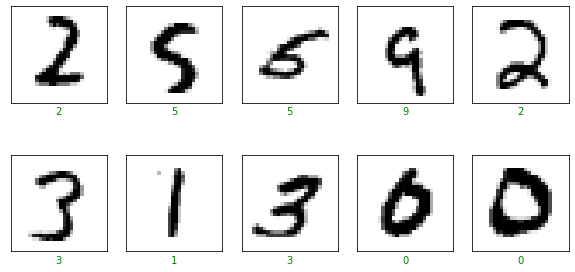

In [8]:
(x_train,y_train),(x_test,y_test) = nn_utils.load_data()
nn_utils.plot_random_examples(x_train,y_train).show()

In [9]:
net = NeuralNetwork([784,128,128,10])
net.info()


Input Features: 784
Number of Classes: 10
Hidden Layers:
--------------
Layer 1, Units 128
Layer 2, Units 128
--------------
Number of parameters: 118282


In [14]:
batch_size =200
epochs = 20
steps_per_epoch = int(x_train.shape[0]/batch_size)
lr = 3e-5
print('Steps per epoch',steps_per_epoch)

Steps per epoch 300


In [15]:
history = net.train(x_train,y_train,
                    x_test,y_test,
                    epochs,steps_per_epoch,
                    batch_size, lr)

Epoch 0...........Val acc: 0.2439
Epoch 1...........Val acc: 0.296
Epoch 2...........Val acc: 0.3352
Epoch 3...........Val acc: 0.3709
Epoch 4...........Val acc: 0.4007
Epoch 5...........Val acc: 0.4289
Epoch 6...........Val acc: 0.4493
Epoch 7...........Val acc: 0.4688
Epoch 8...........Val acc: 0.4866
Epoch 9...........Val acc: 0.5035
Epoch 10...........Val acc: 0.5172
Epoch 11...........Val acc: 0.5298
Epoch 12...........Val acc: 0.5417
Epoch 13...........Val acc: 0.5529
Epoch 14...........Val acc: 0.5621
Epoch 15...........Val acc: 0.5721
Epoch 16...........Val acc: 0.5813
Epoch 17...........Val acc: 0.5902
Epoch 18...........Val acc: 0.5979
Epoch 19...........Val acc: 0.6047


##Task 8: Results
* Plotting the training results.
* A look at predictions on the test set.

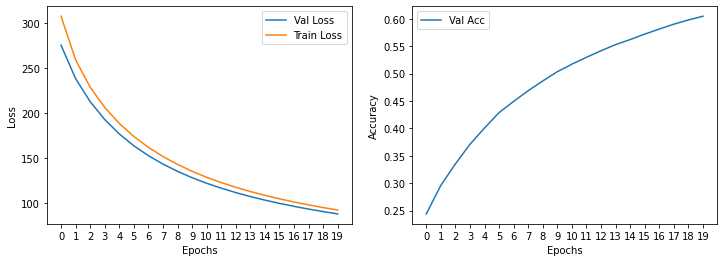

In [16]:
nn_utils.plot_results(history).show()

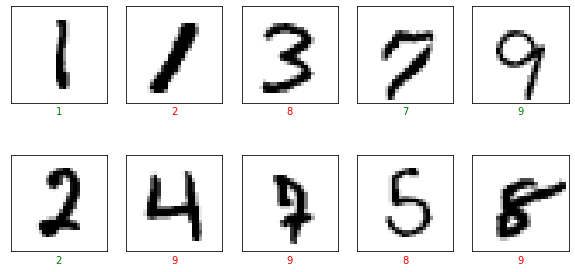

In [17]:
preds = net.predict(x_test)
nn_utils.plot_random_examples(x_test,y_test,preds.numpy()).show()